# Missing value imputation: EndTailImputer

The EndTailImputer() transforms features by replacing missing data by a value at
either tail of the distribution. Ti works only with numerical variables.

Examples on how to use the missing values imputers available in Feature-engine.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.imputation import end_tail

In [18]:
data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [20]:
X_train[['LotFrontage', 'MasVnrArea']].isnull().mean()

LotFrontage    0.184932
MasVnrArea     0.004892
dtype: float64

### Gaussian, right tail

In [21]:
tail_imputer = end_tail.EndTailImputer(imputation_method='gaussian',
                                  tail='right',
                                  fold=3,
                                  variables=['LotFrontage', 'MasVnrArea'])

tail_imputer.fit(X_train)

EndTailImputer(variables=['LotFrontage', 'MasVnrArea'])

In [22]:
tail_imputer.imputer_dict_

{'LotFrontage': 138.9022201686726, 'MasVnrArea': 648.3947111415157}

In [23]:
# transform the data
train_t = tail_imputer.transform(X_train)
test_t = tail_imputer.transform(X_test)

# and check we no longer have NA
train_t['LotFrontage'].isnull().sum()

0

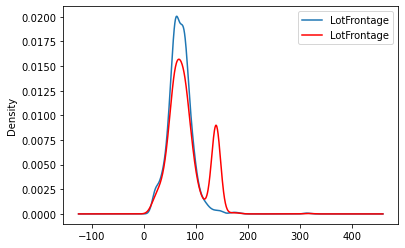

In [24]:
# we can see that the distribution has changed slightly with
# more values accumulating towards the right tail

fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
train_t['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### IQR distribution, left tail

In [25]:
tail_imputer = end_tail.EndTailImputer(imputation_method='iqr',
                                  tail='left',
                                  fold=3,
                                  variables=['LotFrontage', 'MasVnrArea'])

tail_imputer.fit(X_train)

EndTailImputer(imputation_method='iqr', tail='left',
               variables=['LotFrontage', 'MasVnrArea'])

In [26]:
tail_imputer.imputer_dict_

{'LotFrontage': -8.0, 'MasVnrArea': -510.0}

In [27]:
# transform the data
train_t = tail_imputer.transform(X_train)
test_t = tail_imputer.transform(X_test)

train_t[['LotFrontage', 'MasVnrArea']].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

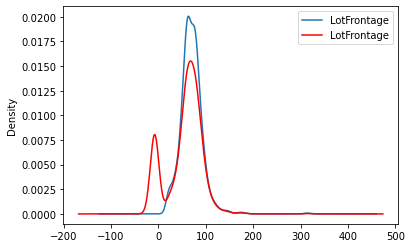

In [28]:
# we can see that the distribution has changed slightly with now more values
#  accumulating towards the  left tail

fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
train_t['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Max distribution

In [42]:
tail_imputer = end_tail.EndTailImputer(imputation_method='max',
                                  
                                  fold=3,
                                  variables=['LotFrontage', 'MasVnrArea'])

tail_imputer.fit(X_train)

EndTailImputer(imputation_method='max', variables=['LotFrontage', 'MasVnrArea'])

In [43]:
tail_imputer.imputer_dict_

{'LotFrontage': 939.0, 'MasVnrArea': 4800.0}

In [44]:
# transform the data
train_t = tail_imputer.transform(X_train)
test_t = tail_imputer.transform(X_test)

train_t[['LotFrontage', 'MasVnrArea']].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

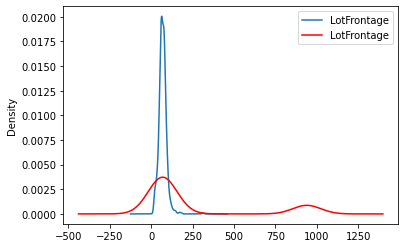

In [45]:
# we can see that the distribution has changed slightly with now more values
#  accumulating towards the  left tail

fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
train_t['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')